In [2]:
from paper2.dataset import Dataset
from paper2.ga import run_ga
from paper2.ga import test_ga
from paper2.MIN import MIN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
import warnings
import pydot as pyd
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [3]:
%load_ext autoreload
%autoreload 1
%aimport paper3.tools
%aimport pyloess.Loess
%reload_ext autoreload
%matplotlib inline  

In [4]:
from paper3.tools import import_datasets
from paper3.tools import intersection
from paper3.tools import filter_by_row_index
from pyloess.Loess import Loess

In [5]:
colors = sns.color_palette()
len(colors)

10

In [6]:
import os
dirs = os.listdir('../Data/processed')
#print(dirs)

In [7]:
paths_faecal_and_oral = ['../Data/processed/M3_feces_L5.csv', '../Data/processed/F4_feces_L5.csv', '../Data/processed/M3_tongue_L5.csv', '../Data/processed/F4_tongue_L5.csv'] 
paths_hands = ['../Data/processed/M3_R_palm_L5.csv', '../Data/processed/M3_L_palm_L5.csv', '../Data/processed/F4_R_palm_L5.csv', '../Data/processed/F4_L_palm_L5.csv']

paths_neonatal = []
for i in range(0, 10):
    paths_neonatal.append('../Data/raw_la_rosa2014/'+str(i)+'.csv')

paths = paths_neonatal

dfs = import_datasets(paths, count=10, delta_t=20)
U = intersection(dfs)
len(U), U

(7,
 {'Actinobacteria',
  'Alphaproteobacteria',
  'Bacilli',
  'Bacteroidia',
  'Betaproteobacteria',
  'Clostridia',
  'Gammaproteobacteria'})

In [8]:
new_dfs = filter_by_row_index(dfs, U)
for i in range(len(new_dfs)):
    new_dfs[i].columns = new_dfs[i].columns.astype(float)

In [9]:
dfs[2].df

30.5      35.38      42.63      43.38       44.5  \
Gammaproteobacteria    94.257560  94.951535  98.913590  78.481863  64.404576   
Clostridia              0.025484   0.000000   0.553264   8.049709  22.750910   
Bacilli                 5.674482   5.048465   0.513027  13.233318  12.740510   
Actinobacteria          0.008495   0.000000   0.020119   0.235110   0.104004   
Bacteroidia             0.000000   0.000000   0.000000   0.000000   0.000000   
Alphaproteobacteria     0.025484   0.000000   0.000000   0.000000   0.000000   
Betaproteobacteria      0.008495   0.000000   0.000000   0.000000   0.000000   
Cyanobacteria           0.000000   0.000000   0.000000   0.000000   0.000000   
Epsilonproteobacteria   0.000000   0.000000   0.000000   0.000000   0.000000   
Erysipelotrichi         0.000000   0.000000   0.000000   0.000000   0.000000   

                           45.33      46.21      48.21      49.08      50.46  \
Gammaproteobacteria    57.030492  77.130045  55.400112  60.713574  46.103135   
Clostridia             39.704773  21.999472  41.839209  36.515846  49.414005   
Bacilli                 3.264734   0.870483   2.760679   2.710783   4.482860   
Actinobacteria          0.000000   0.000000   0.000000   0.059797   0.000000   
Bacteroidia             0.000000   0.000000   0.000000   0.000000   0.000000   
Alphaproteobacteria     0.000000   0.000000   0.000000   0.000000   0.000000   
Betaproteobacteria      0.000000   0.000000   0.000000   0.000000   0.000000   
Cyanobacteria           0.000000   0.000000   0.000000   0.000000   0.000000   
Epsilonproteobacteria   0.000000   0.000000   0.000000   0.000000   0.000000   
Erysipelotrichi         0.000000   0.000000   0.000000   0.000000   0.000000   

                           52.08      53.08      54.99      55.58      56.08  \
Gammaproteobacteria    56.169368  65.962632  47.266759  26.242596  48.735178   
Clostridia             40.572279  31.762794  48.882717  69.508112  47.727273   
Bacilli                 3.225273   2.274574   3.787401   4.249292   3.498024   
Actinobacteria          0.033080   0.000000   0.050499   0.000000   0.039526   
Bacteroidia             0.000000   0.000000   0.012625   0.000000   0.000000   
Alphaproteobacteria     0.000000   0.000000   0.000000   0.000000   0.000000   
Betaproteobacteria      0.000000   0.000000   0.000000   0.000000   0.000000   
Cyanobacteria           0.000000   0.000000   0.000000   0.000000   0.000000   
Epsilonproteobacteria   0.000000   0.000000   0.000000   0.000000   0.000000   
Erysipelotrichi         0.000000   0.000000   0.000000   0.000000   0.000000   

                            57.1      57.23      60.35      61.08      68.96  
Gammaproteobacteria    54.332314  49.009362  44.112219  40.921903  49.424342  
Clostridia             40.530071  44.654910  50.775194  54.402255  44.786184  
Bacilli                 5.096840   6.313956   5.057217   4.675841   5.542763  
Actinobacteria          0.020387   0.021772   0.055371   0.000000   0.246711  
Bacteroidia             0.020387   0.000000   0.000000   0.000000   0.000000  
Alphaproteobacteria     0.000000   0.000000   0.000000   0.000000   0.000000  
Betaproteobacteria      0.000000   0.000000   0.000000   0.000000   0.000000  
Cyanobacteria           0.000000   0.000000   0.000000   0.000000   0.000000  
Epsilonproteobacteria   0.000000   0.000000   0.000000   0.000000   0.000000  
Erysipelotrichi         0.000000   0.000000   0.000000   0.000000   0.000000

In [10]:
new_dfs[1]

55.63      58.00      60.25      62.42
Clostridia           51.962923  67.906239  72.559818  56.743088
Gammaproteobacteria  26.772083  21.748326  14.546145   7.636548
Bacilli              21.065067   8.565386   7.330042  12.036413
Actinobacteria        0.199927   1.656680   3.721990   6.507080
Bacteroidia           0.000000   0.035249   0.018990   0.000000
Betaproteobacteria    0.000000   0.017624   0.000000   0.000000
Alphaproteobacteria   0.000000   0.000000   0.000000   0.000000

## Visualise each OTU

Betaproteobacteria


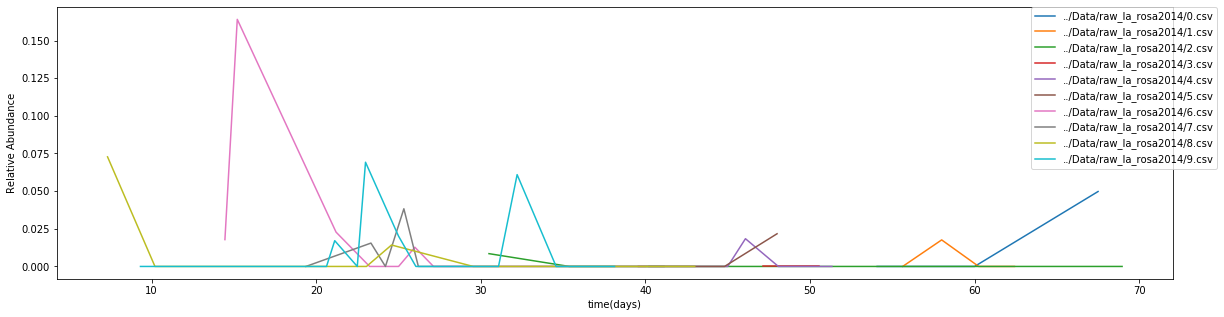

Clostridia


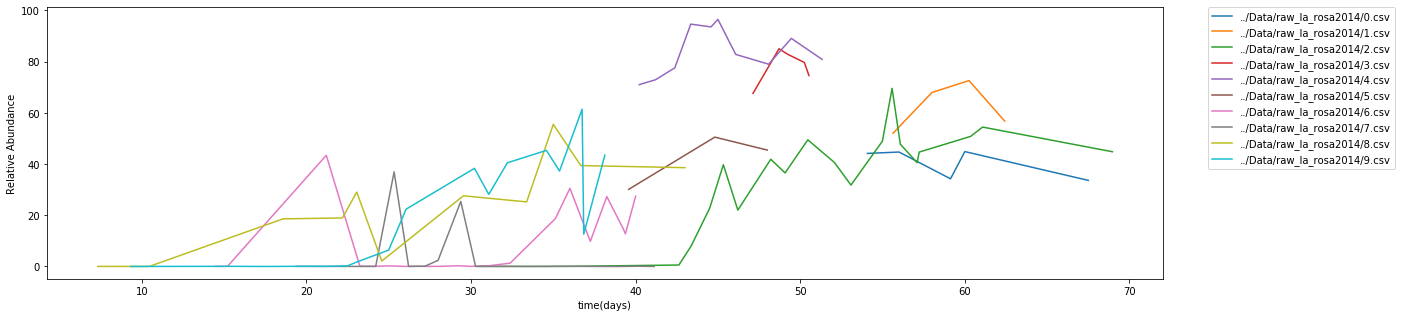

Actinobacteria


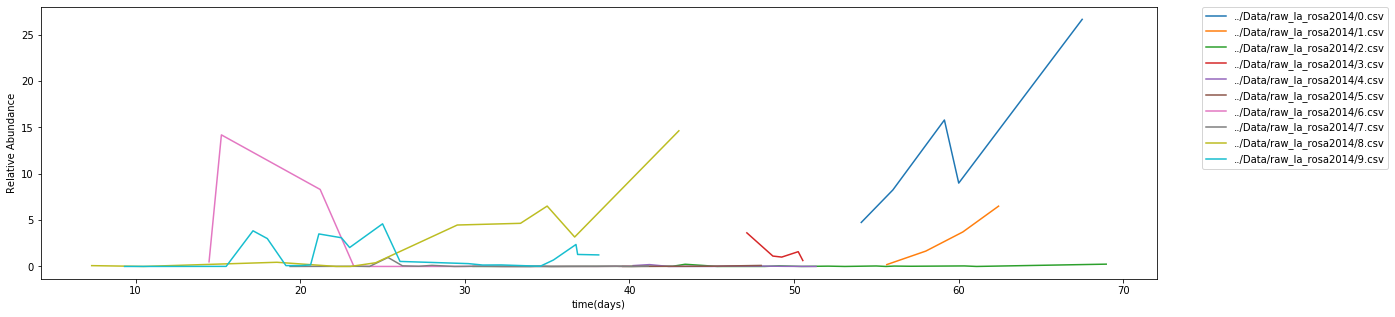

Gammaproteobacteria


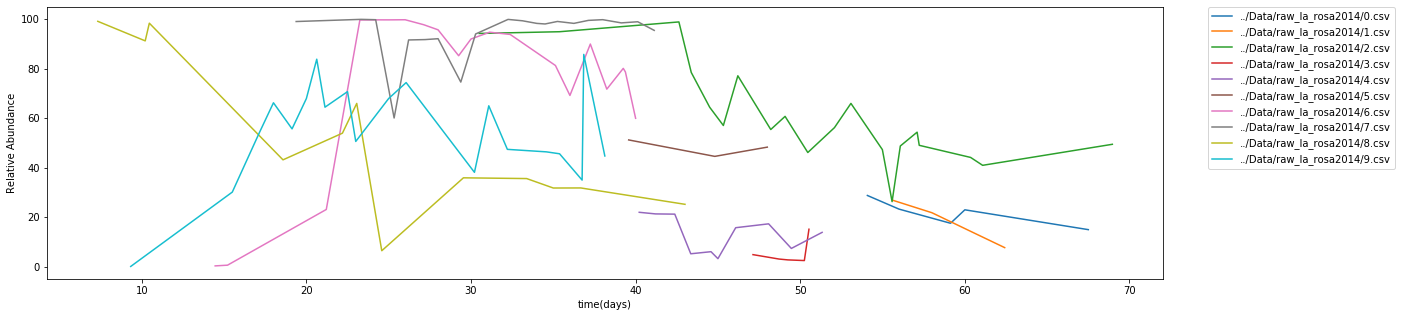

Bacilli


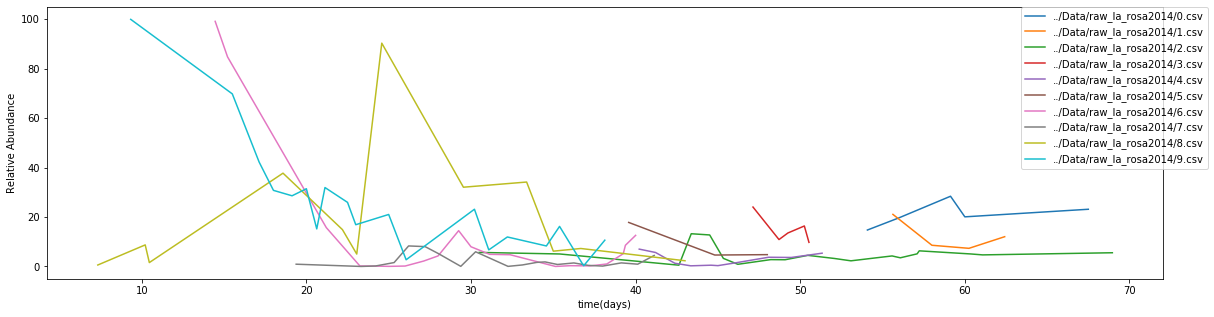

Bacteroidia


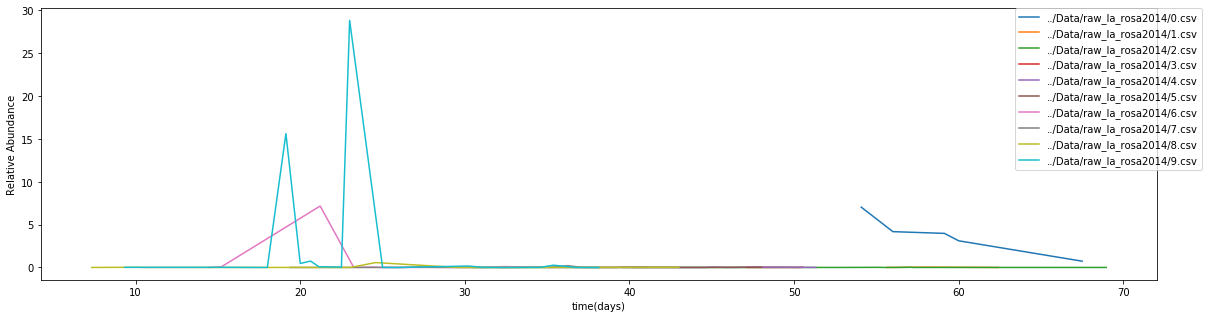

Alphaproteobacteria


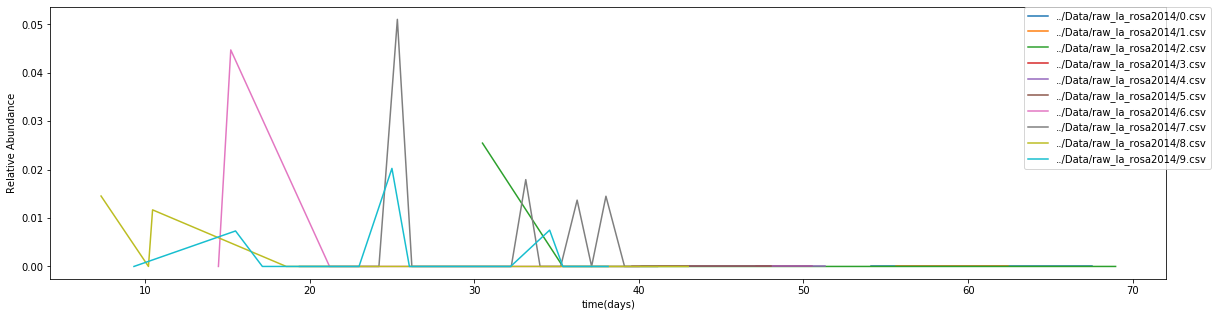

In [11]:
for OTU in U:
    print(OTU)
    plt.figure(figsize=(20,5))
    for i, df in enumerate(new_dfs):
        plt.plot(df.loc[OTU], color=colors[i%len(colors)], label=paths[i])    
    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.xlabel("time(days)")
    plt.ylabel("Relative Abundance")
    plt.show()

## BSpline Interpolation

In [12]:
meta_spls = []
for OTU in U:
    spls= []
    for i, df in enumerate(new_dfs):
        spl = interpolate.splrep(df.columns, df.loc[OTU], s=0, k=3)
        spls.append(spl)
    meta_spls.append(spls)

TypeError: m > k must hold

Betaproteobacteria


IndexError: list index out of range

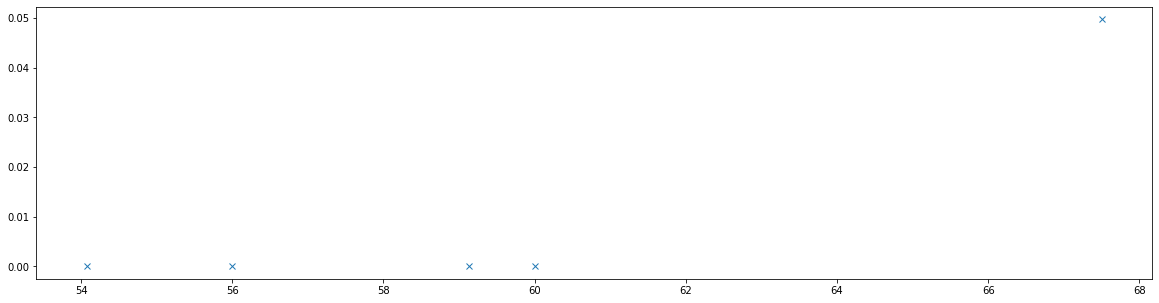

In [13]:
N=200
#x_s = set.intersection(*[set(x.columns) for x in new_dfs])
#xmin, xmax = min(x_s), max(x_s)
for i, OTU in enumerate(U):
    print(OTU)
    plt.figure(figsize=(20,5))
    for j, df in enumerate(new_dfs):
        plt.plot(df.loc[OTU], color=colors[j], ls='None', marker="x", label=paths[j])
        plt.plot(np.linspace(min(df.columns), max(df.columns), N), interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[i][j]), color=colors[j%len(colors)], ls='-', label=None)
    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.xlabel("time(days)")
    plt.ylabel("Relative Abundance")
    plt.grid()
    plt.show()

## LOESS Smoothening

In [308]:
k = 8

N=200
x_s = set.union(*[set(x.columns) for x in new_dfs])
xmin, xmax = min(x_s), max(x_s)
xx = np.linspace(xmin, xmax, N)

meta_loesses = []
for OTU in U:
    loesses= []
    for i, df in enumerate(new_dfs):
        loess = Loess(np.asarray(df.columns), np.asarray(df.loc[OTU]))
        yy = np.zeros_like(xx)
        for j in range(len(xx)):
            yy[j] = loess.estimate(xx[j], window=k)
        loesses.append(yy)
    meta_loesses.append(loesses)

k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae


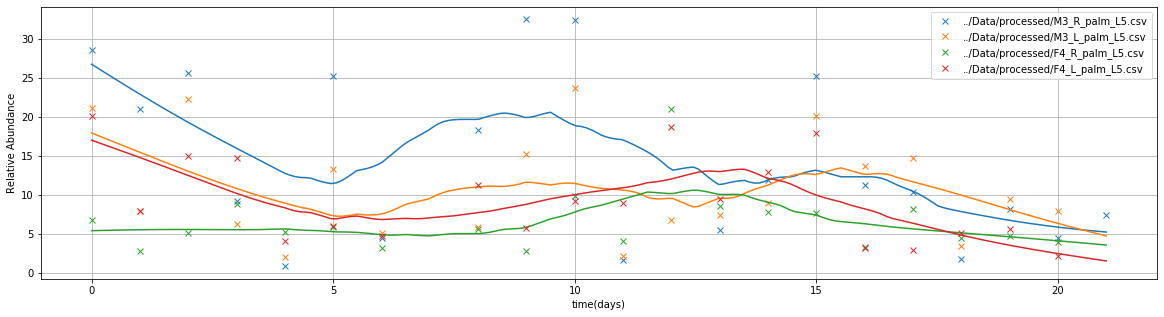

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__Pseudomonadaceae


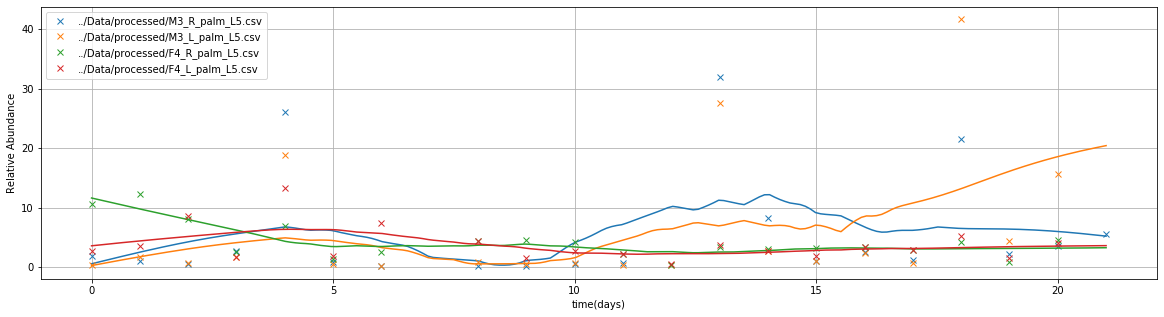

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae


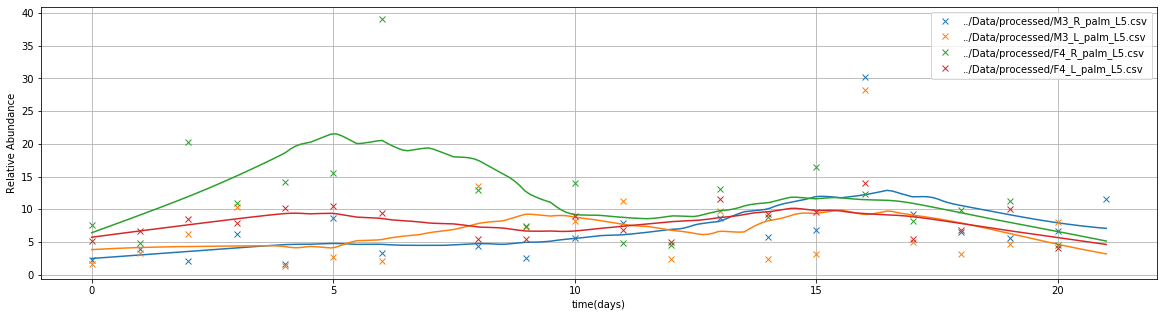

k__Bacteria;p__Actinobacteria;c__Actinobacteria (class);o__Actinomycetales;f__Corynebacteriaceae


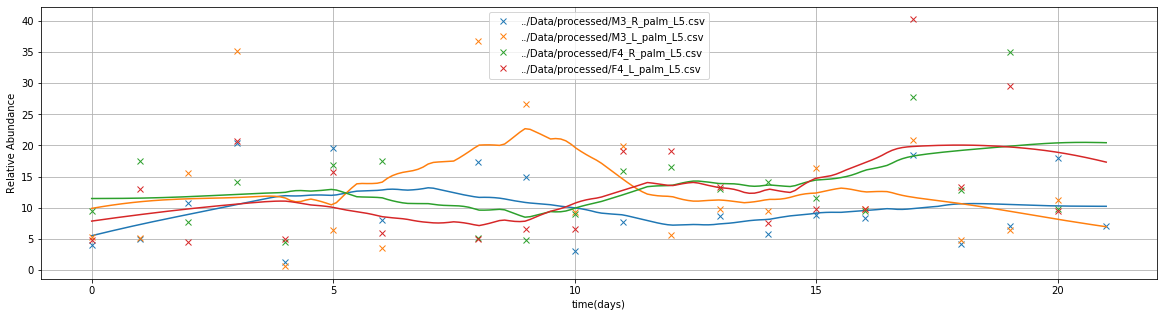

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae


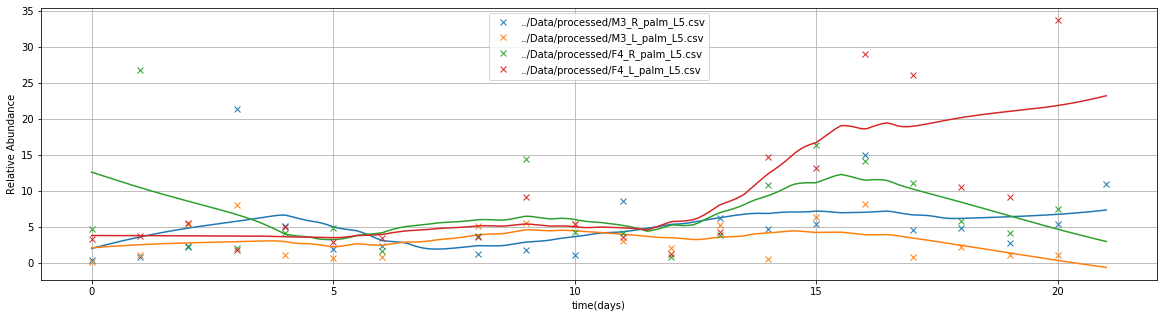

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae


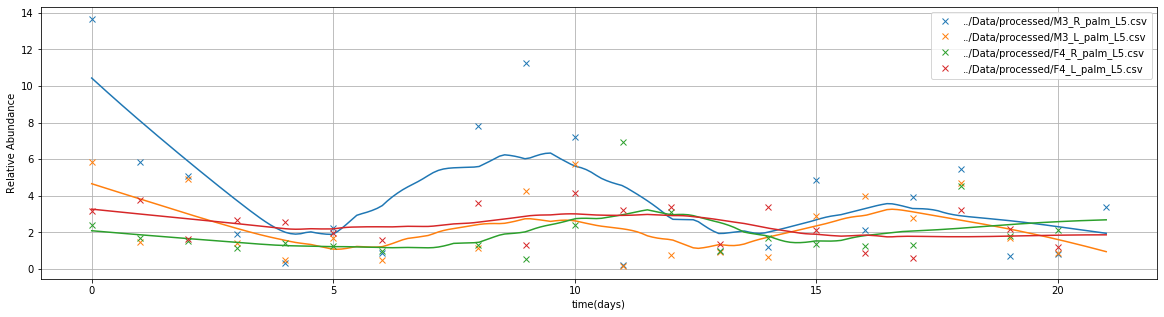

k__Bacteria;p__Cyanobacteria;c__;o__;f__


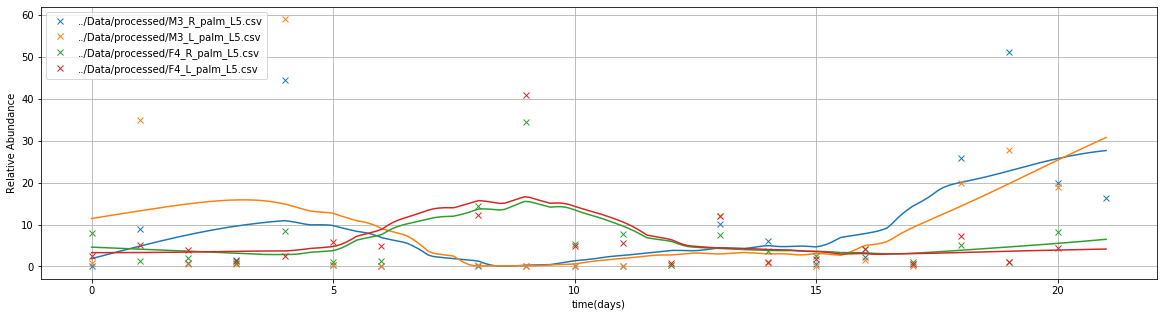

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales Family XI. Incertae Sedis


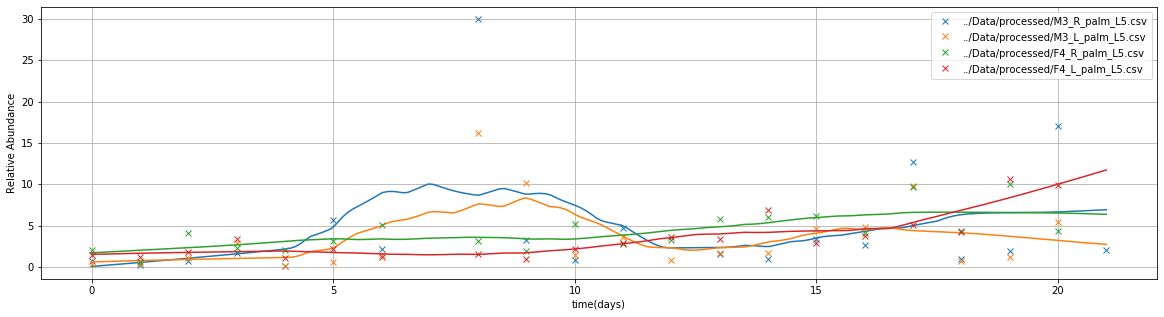

In [309]:
N=200
x_s = set.union(*[set(x.columns) for x in new_dfs])
xmin, xmax = min(x_s), max(x_s)
xx = np.linspace(xmin, xmax, N)

for i, OTU in enumerate(U):
    print(OTU)
    plt.figure(figsize=(20,5))
    for j, df in enumerate(new_dfs):
        plt.plot(df.loc[OTU], color=colors[j], ls='None', marker='x', label=paths[j])
        plt.plot(xx, meta_loesses[i][j], color=colors[j], ls='-', label=None)
    plt.legend(loc="best")
    plt.xlabel("time(days)")
    plt.ylabel("Relative Abundance")
    plt.grid()
    plt.show()

## LOESS vs BSpline

k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae


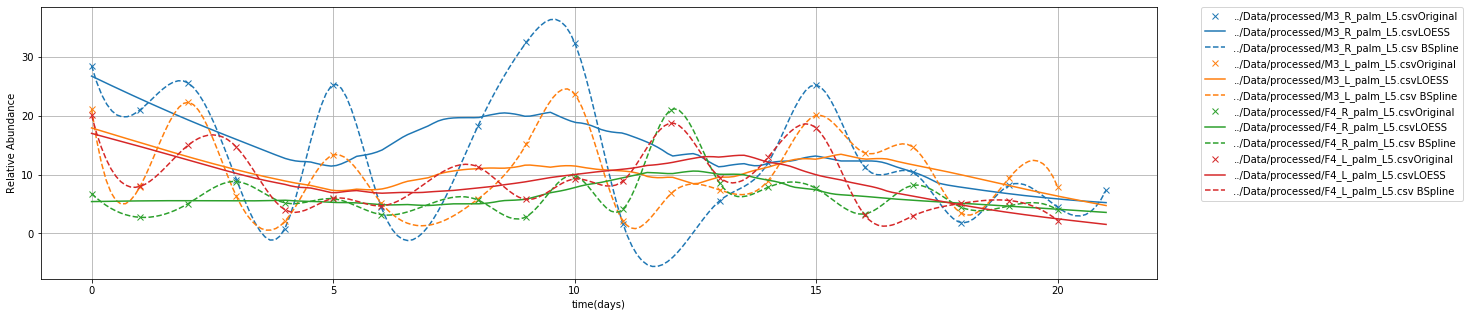

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__Pseudomonadaceae


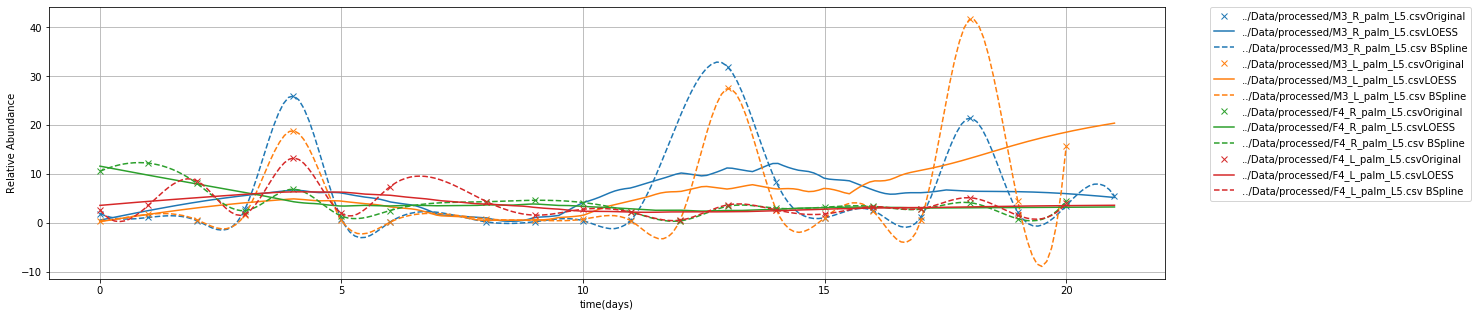

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae


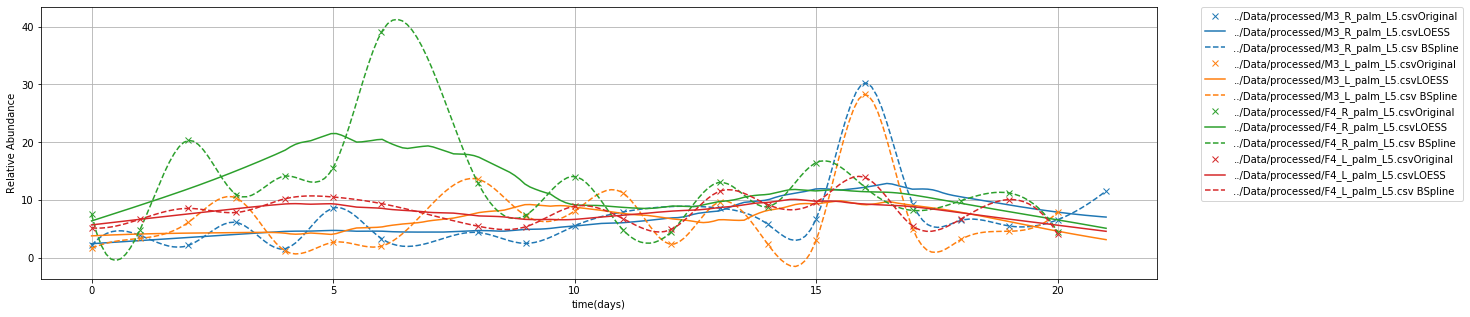

k__Bacteria;p__Actinobacteria;c__Actinobacteria (class);o__Actinomycetales;f__Corynebacteriaceae


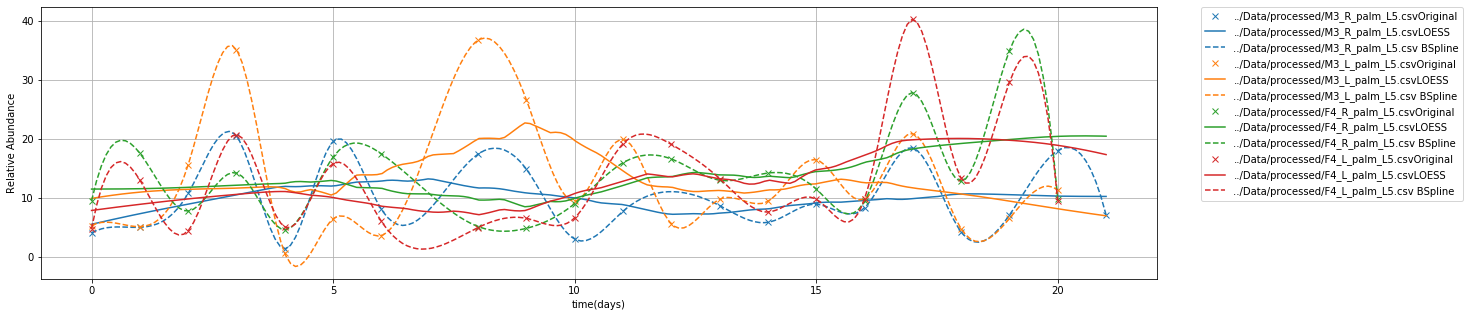

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae


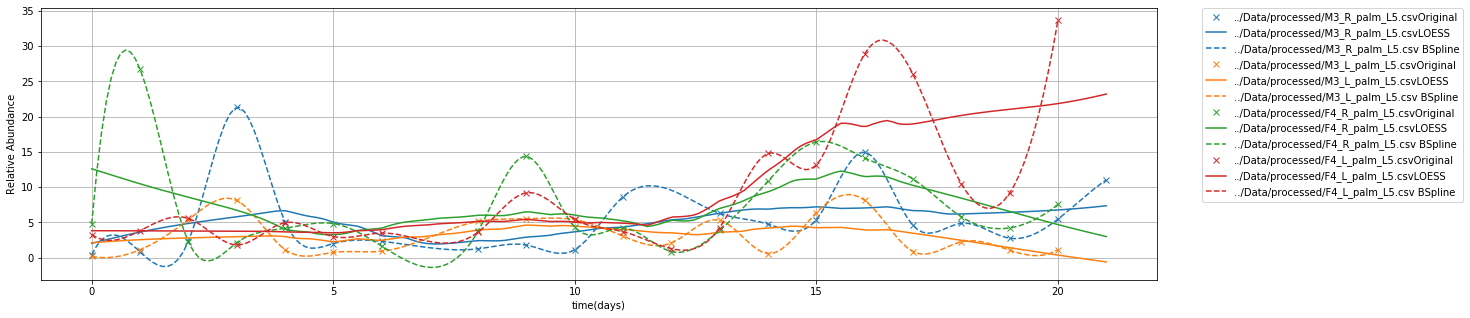

k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae


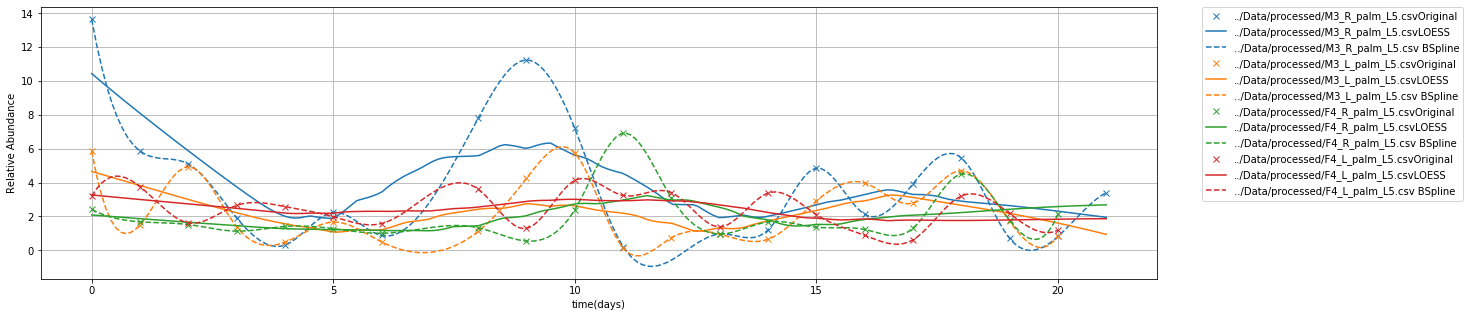

k__Bacteria;p__Cyanobacteria;c__;o__;f__


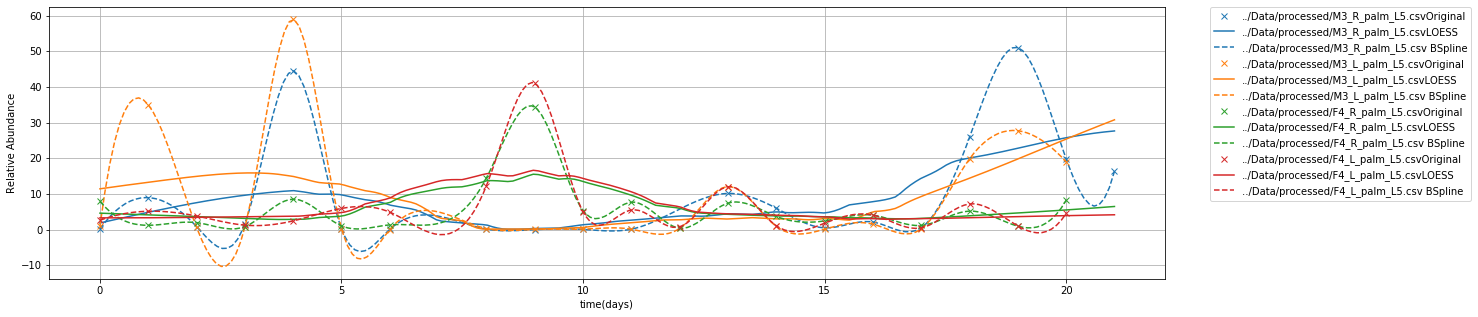

k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales Family XI. Incertae Sedis


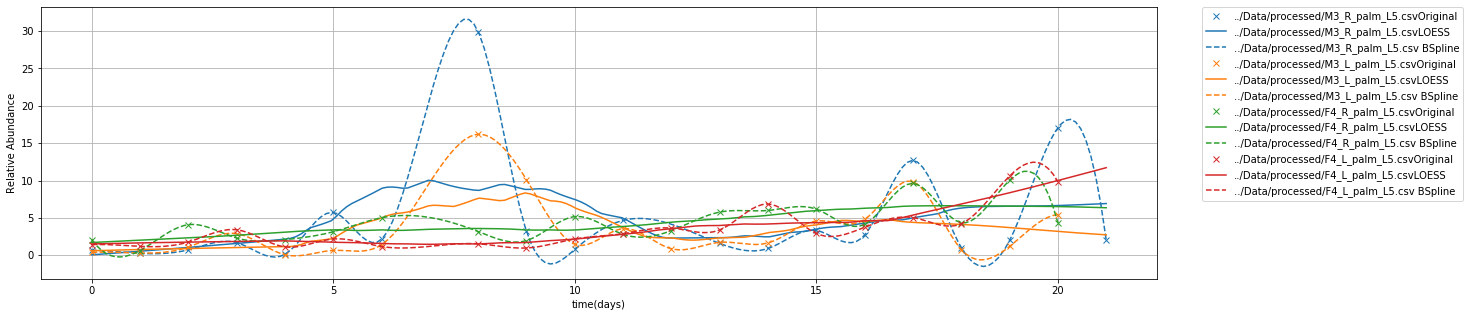

In [310]:
N=200
x_s = set.union(*[set(x.columns) for x in new_dfs])
xmin, xmax = min(x_s), max(x_s)
xx = np.linspace(xmin, xmax, N)

for i, OTU in enumerate(U):
    print(OTU)
    plt.figure(figsize=(20,5))
    for j, df in enumerate(new_dfs):
        plt.plot(df.loc[OTU], color=colors[j], marker='x', ls='None', label=paths[j]+'Original')
        plt.plot(xx, meta_loesses[i][j], color=colors[j], ls='-', label=paths[j]+'LOESS')
        plt.plot(np.linspace(min(df.columns), max(df.columns), N), interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[i][j]), color=colors[j], ls='--', label=paths[j]+' BSpline')
    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.xlabel("time(days)")
    plt.ylabel("Relative Abundance")
    plt.grid()
    plt.show()

## Aligning


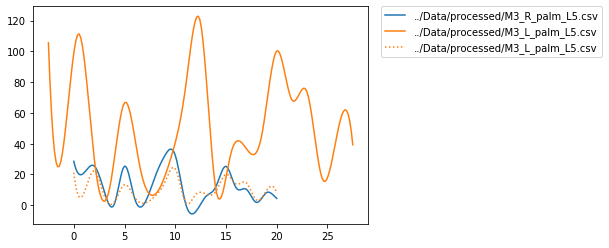

In [311]:
plt.plot( np.linspace(min(df.columns), max(df.columns), N), 
         interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][0]), 
         color=colors[0], ls='-', label=paths[0])

plt.plot( np.linspace(min(df.columns), max(df.columns), N)*1.5 - 2.5, 
         interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][1])*5 - 0.17, 
         color=colors[1], ls='-', label=paths[1])

plt.plot( np.linspace(min(df.columns), max(df.columns), N), 
         interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][1]), 
         color=colors[1], ls=':', label=paths[1])

#plt.plot( np.linspace(min(df.columns), max(df.columns), N), 
#         interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][2]), 
#         color=colors[2], ls='-', label=paths[2])

#plt.plot( np.linspace(min(df.columns), max(df.columns), N), 
#         interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][3]), 
#         color=colors[3], ls='-', label=paths[3])

plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

In [312]:
interpolate.splev(np.linspace(min(df.columns), max(df.columns), N), meta_spls[0][2]) + 10

array([16.79542203, 16.04429551, 15.37565299, 14.78747309, 14.27773445,
       13.8444157 , 13.48549546, 13.19895236, 12.98276504, 12.83491213,
       12.75337225, 12.73612403, 12.78114612, 12.88641712, 13.04991568,
       13.26962043, 13.54350999, 13.869563  , 14.24575808, 14.67007387,
       15.14048598, 15.65097282, 16.18363562, 16.71837972, 17.23511044,
       17.71373311, 18.13415306, 18.47627562, 18.72000611, 18.84524987,
       18.83193977, 18.67230586, 18.39019164, 18.01445063, 17.57393635,
       17.09750232, 16.61400209, 16.15228916, 15.74121707, 15.40963934,
       15.18633884, 15.08511832, 15.08635791, 15.16591544, 15.29964875,
       15.46341567, 15.63307404, 15.78448168, 15.89349643, 15.93597612,
       15.88789568, 15.73939713, 15.50813715, 15.21493369, 14.88060467,
       14.52596804, 14.17184174, 13.83904369, 13.54839184, 13.32070413,
       13.17665515, 13.12582914, 13.15901145, 13.26516643, 13.43325847,
       13.65225192, 13.91111116, 14.19880056, 14.50428449, 14.81

In [313]:
x = np.asarray(df.columns)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [314]:
y = np.asarray(df.loc[list(U)[0]])
y

array([20.11257125,  7.99946282, 15.03940088, 14.70811221,  4.05878012,
        5.96645063,  4.70602653, 11.34530938,  5.79559718,  9.28712619,
        8.93540917, 18.7968268 ,  9.5229805 , 12.93992793, 17.94139056,
        3.15038149,  2.98471537,  5.12322805,  5.61236913,  2.2016646 ])

In [240]:
for i in range(10, 20):
    print(i)

10
11
12
13
14
15
16
17
18
19
